In [354]:
import pandas as pd
import seaborn as sns
df = pd.DataFrame({'name' : ['Alex', 'Felix', 'X', 'Alex', 
                             'Felix', 'Alex', 'X'],
                   'age' : [56, 60, 46, 70, 82, 90, 12],
                   'skill' : ['a', 'b', 'c', 'b', 'a', 'a', 'a']})

df.sort_values(['name', 'skill'])

,name,age,skill
0,Alex,56,a
5,Alex,90,a
3,Alex,70,b
4,Felix,82,a
1,Felix,60,b
6,X,12,a
2,X,46,c


In [320]:
##only run set_index once becuase the column in no longer
##available after you set it as index
#df.set_index('name', inplace=True)
##use value counts on series
df.index.value_counts()

Alex     3
X        2
Felix    2
Name: name, dtype: int64

In [321]:
##or on a single column
df['skill'].value_counts()

a    4
b    2
c    1
Name: skill, dtype: int64

In [280]:
df.sort_values('age', inplace=True)
df.reset_index(inplace=True)

In [311]:
df['skill'].value_counts()

a    4
b    2
c    1
Name: skill, dtype: int64

In [357]:
df_indexed = df.set_index(['skill', 'name'])
df_indexed?

In [307]:
##how to access records with multi-index
df_indexed.loc[df_indexed.index.isin([('a', 'Felix'), ('a','Alex')])]

#match certain values with certain columns. 
#Use a dict where the key is the column and value is a 
#list of items you want to check for.

values = {'name': ['Alex', 'Felix'], 'skill': ['a', 'a']}

df.isin(values)

,name,age,skill
0,False,False,True
1,False,False,False
2,True,False,True
3,True,False,False
4,True,False,False
5,True,False,True
6,True,False,True


In [358]:
df_group = df.groupby(['name'])

df['rank'] = df.groupby(['skill'])['age'].rank(ascending=False)

sns.heatmap(df.groupby(['skill'])['age'].unstack())

AttributeError: Cannot access callable attribute 'unstack' of 'SeriesGroupBy' objects, try using the 'apply' method

In [345]:
df_group.age.rank(ascending=False)
df_group.head()

#.rank(ascending='False')
#df_group.head()

,age,skill
name,,
Alex,56,a
Felix,60,b
X,46,c
Alex,70,b
Felix,82,a
Alex,90,a
X,12,a


In [343]:
#df_group = df.groupby(['name'])
df_group.rank()

,age
name,
Alex,2.0
Felix,1.0
X,1.0
Alex,2.0
Felix,3.0
Alex,4.0
X,1.0


In [3]:
##use lambda functoin to get idx max
df.iloc[df_group.apply(lambda x: x.idxmax()[0])]

,name,age,skill
5,Alex,90,a
3,Alex,70,b
4,Felix,82,a
1,Felix,60,b
6,X,12,a
2,X,46,c


In [6]:
#note this function returns the same answer as idxmax above
def get_max_record(group, message):
   #print(group.idxmax())
   #print(message)
   return group.idxmax(axis=1)

def get_max(group, message):
   #print(group.idxmax())
   #print(message)
   return group.max()

In [ ]:
rows = df_group['age'].apply(get_max_record, message='test')

In [33]:
under_60 = df.age < 60

df.loc[under_60]

,name,age,skill
0,Alex,56,a
2,X,46,c
6,X,12,a


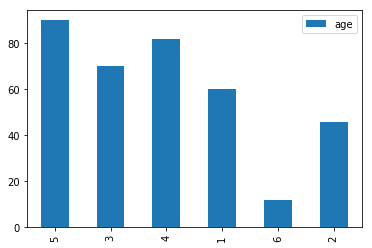

In [21]:
##note alex 56, a is not in the list because Alex 90 a is ma

df.iloc[rows].plot(kind='bar')

In [ ]:
##cut command
df['age_groups'] = pd.cut(df.age, bins=[0, 18, 65, 99], 
                          labels=['child', 'adult', 'elderly'])

In [ ]:
##cool way to get different summary statistics using a dict
df.agg({'ext price': ['sum', 'mean'], 
        'quantity': ['sum', 'mean'], 'unit price': ['mean']})

##gets max in each value_counts
get_max = lambda x: x.value_counts(dropna=False).index[0]

##nice way to use an ordered dict to specify the order
import collections
f = collections.OrderedDict([('ext price', ['sum', 'mean']), ('quantity', ['sum', 'mean']), ('sku', [get_max])])
df.agg(f)

In [ ]:
#df.isin(values) method wich tests whether each element 
#in the DataFrame is contained in values. 


df.loc[df['channel'].isin(['sale','fullprice'])]
##alternatively
df.loc[df['channel'].apply(lambda x: x in ['sale','fullprice'])] 
#can be modified to check any complitcated condition 
#depending on just one column. – 

In [ ]:
##dropping columns
sample_df = df.drop(['accommodates', 'bathrooms', 'bedrooms', 
                           'beds', 'bed_type', 'amenities'], axis=1)

##drop columns with NaN values; dropna() note axis = 1 for columns
sample_df = df.dropna(axis=1)
##drop rows based on index
final_df = sample_df.drop(df.index[0:3], axis=0)
final_df.head(10)

In [107]:
##begin baby names by state

import pandas as pd
import glob
from matplotlib import pyplot as plt
%matplotlib notebook
files = sorted(glob.glob('./Desktop/namesbystate/*.TXT'))

#print(files)

cols = ['state', 'sex', 'year', 'name', 'n']

#empty data frame
#df = pd.DataFrame(columns = cols)

In [182]:
#this append operation is necessary because the files broken up by state
df = None
for file in files:
  print(file)
  if df is not None:
     df = df.append(pd.read_csv(file,names=cols, 
                                dtype = {"n" : "int64", 
                                         "year": "int64"})) #nrows=200))
  else:
     df = pd.read_csv(file,names=cols)
 

./Desktop/namesbystate/AK.TXT
./Desktop/namesbystate/AL.TXT
./Desktop/namesbystate/AR.TXT
./Desktop/namesbystate/AZ.TXT
./Desktop/namesbystate/CA.TXT
./Desktop/namesbystate/CO.TXT
./Desktop/namesbystate/CT.TXT
./Desktop/namesbystate/DC.TXT
./Desktop/namesbystate/DE.TXT
./Desktop/namesbystate/FL.TXT
./Desktop/namesbystate/GA.TXT
./Desktop/namesbystate/HI.TXT
./Desktop/namesbystate/IA.TXT
./Desktop/namesbystate/ID.TXT
./Desktop/namesbystate/IL.TXT
./Desktop/namesbystate/IN.TXT
./Desktop/namesbystate/KS.TXT
./Desktop/namesbystate/KY.TXT
./Desktop/namesbystate/LA.TXT
./Desktop/namesbystate/MA.TXT
./Desktop/namesbystate/MD.TXT
./Desktop/namesbystate/ME.TXT
./Desktop/namesbystate/MI.TXT
./Desktop/namesbystate/MN.TXT
./Desktop/namesbystate/MO.TXT
./Desktop/namesbystate/MS.TXT
./Desktop/namesbystate/MT.TXT
./Desktop/namesbystate/NC.TXT
./Desktop/namesbystate/ND.TXT
./Desktop/namesbystate/NE.TXT
./Desktop/namesbystate/NH.TXT
./Desktop/namesbystate/NJ.TXT
./Desktop/namesbystate/NM.TXT
./Desktop/

In [262]:
##value_counts() returns a series with variable (e.g. name) as index
counts = df.name.value_counts() 
counts

df.set_index('name')

df.iloc[counts]

,state,sex,year,name,n
45756,CA,F,1962,Julie,2149
141799,OH,M,1965,William,2157
92958,IN,M,1951,Robert,2159
11688,NY,F,1927,Margaret,2184
201732,NY,M,1958,Jeffrey,2189
5647,OH,F,1921,Betty,2215
243419,CA,M,1946,Gary,2226
262382,CA,M,1965,Eric,2244
107674,GA,M,1926,James,2250
265908,CA,M,1968,Paul,2260


In [256]:
#df.index
#counts
df.dtypes
#df.sort_values(['name', 'year','state', 'n'], 
#               ascending=False, inplace=True)
    
df.sort_values('n', 
               ascending=False, inplace=True)
df_grouped = df.groupby(['name', 'year', 'state']).first()

#df_grouped

In [259]:
df_grouped.tail(10)

sex   n
name     year state        
Zyriah   2007 TX      F   8
         2008 TX      F  10
         2009 TX      F   5
         2011 LA      F   6
         2012 GA      F   5
         2013 TX      F   7
         2014 TX      F   6
         2016 LA      F   5
Zyron    2015 TX      M   5
Zyshonne 1998 GA      M   5

In [241]:
ranks

<bound method GroupBy.rank of <pandas.core.groupby.groupby.DataFrameGroupBy object at 0x130faf588>>

In [211]:
##the following generates a series of years for matching
dates = pd.date_range('1/1/1910', periods=109, freq='Y').year.to_series()
#year = pd.to_datetime(dates).year
#dates

In [212]:
counts = df_grouped.size()

In [220]:
#counts.loc['Alex']

test = pd.concat([counts['Jane'], dates],axis=1).fillna(0)

test.columns = ['count', 'year']
test.plot(x='year', y='count')

#use a callable on a series to select
#df1.A.loc[lambda s: s > 0]

ValueError: Length mismatch: Expected axis has 1 elements, new values have 2 elements

In [152]:
counts.head()



name   year
Aaden  2007    2
       2008    3
       2009    3
       2010    3
       2011    1
dtype: int64

In [112]:
df.set_index('name', inplace=True)
#df

In [113]:
top3 = counts.head(3).index
top3

Index(['James', 'John', 'Mary'], dtype='object')

In [100]:
df.loc[top3]

,state,sex,year,n
name,,,,
James,AK,M,1910,7
James,AK,M,1911,8
James,AK,M,1912,5
James,AK,M,1913,8
James,AK,M,1914,12
James,AK,M,1915,9
James,AK,M,1916,17
James,AK,M,1917,10
James,AK,M,1918,8


In [ ]:
males = df[df['sex'] == 'M'].sort_values('n', ascending=False)

In [ ]:
g_df = df.groupby(['year','state', 'sex'])
df_new = g_df['n'].sum()

In [ ]:
df_new



In [ ]:
g_df.apply(get_max_record)

In [ ]:
df['name'].iloc[78290]

In [ ]:
g_df = df.groupby(['year','state','n'])


In [ ]:
def get_max_record(group):
   #print(group.idxmax())
   return group.n.idxmax()

In [ ]:
g_df.apply(get_max_record)
df[['state','name','year','n']].iloc[[78290,78414, 78551]]

In [ ]:
#males.iloc[212829]
##multiple indices
#test = g_df[1910]

In [ ]:
df.head()
males.iloc[117453]

In [ ]:
g_df.apply(get_max_record)

In [ ]:
df[(df['year']==1911) & (df['state']=='IL')].iloc[0]

In [ ]:
g_df.state =='IL'

In [ ]:
males.groupby(['year','state']).apply(get_max_record)

In [ ]:
df.iloc[130918]

In [ ]:
test = g_df.apply(get_max_record)

In [ ]:
import numpy as np

##the following gives the number of names in each state
test = males.groupby(['year','state'])['name'].nunique()

In [ ]:
test = males.groupby(['year','state'])

test.size()

In [ ]:
#test
#print(test.to_list())
#test = [1,3,10,2]
print(find_argmax(test.to_list()))

In [ ]:
test.apply(find_argmax(test.n))
test

In [ ]:
males.set_index('state', inplace=True)
males.sort_values('n', ascending=False)

In [ ]:
for k,v in test.groups:
    print(k, v)
    

In [ ]:
test = males.sort_values('year')[['year','name','n']]

In [ ]:
test

In [ ]:
#males['age_cat'] = pd.cut(males.year, [1910, 1950, 2000, 2018], 
#                          include_lowest=True,
#                          labels = ['old', 'boomers', 'millineals'])

In [ ]:
#grouped = males.groupby('year')

In [ ]:
males.groupby('age_cat','year')

In [ ]:
males

In [ ]:
#df.set_index(['name','state'], inplace=True)
df_new = df.set_index(['state'])
##use reset_index to go back to original index

In [ ]:
df.count()

In [ ]:
males = df['sex'] == 'M'

In [ ]:
df[males]

In [ ]:
grouped_by_year.groups

In [ ]:
df.sort_values('n')

In [ ]:
plt.show()


In [ ]:
df_rank = df.groupby('rank')
df_rank.head()

for group in df_rank.groups:
    print(group, df_rank.get_group(group).mean())
    


In [76]:
#alternative to the above; doesn't work yet
df = pd.concat((pd.read_csv(file).assign(filename=file) for file in files[:2]), ignore_index=True)

##to save memory on a df only keep columns you need and specify category, 
##where possible
df = pd.read_csv('file.csv', usecols=['A', 'C', 'D'], 
                         dtype={'D':'category'})#Python #pandastricks

##how to rename columns
##1 using dictionaries
df = df.rename({'A':'a', 'B':'b'}, axis='columns')

##2. overwrite all column names:
df.columns = ['a', 'b']

##3. apply string method:
df.columns = df.columns.str.lower()#Python #DataScience 

##make selections
df[(df.color == 'red') | (df.color == 'green') | (df.color == 'blue')]

#1. Shorter way:
df[df.color.isin(['red', 'green', 'blue'])]

#2. Invert the filter:
df[~df.color.isin(['red', 'green', 'blue'])]#Python #pandastricks

##Filter a DataFrame to only include the largest categories.

#1. Save the value_counts() output
counts = movies.genre.value_counts()
2. Get the index of its head()
largest_counts = counts.head(3).index
3. Use that index with isin() to filter the DataFrame


/Users/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  
